In [28]:
###### added all the recomended header files
from selenium import webdriver
import time
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
##### opened the relevant browser
driver = webdriver.Chrome(executable_path='./chromedriver.exe')
driver.get('https://www.instagram.com/accounts/login/?source=auth_switcher')

In [3]:
###### logged into the system
time.sleep(3)
entry = driver.find_element_by_xpath('/html/body/span/section/main/div/article/div/div[1]/div/form/div[2]/div/label/input')
entry.send_keys('SAMPLE_USERNAME')
entry = driver.find_element_by_xpath('/html/body/span/section/main/div/article/div/div[1]/div/form/div[3]/div/label/input')
entry.send_keys('SAMPLE_PASSWORD')

In [4]:
##### clicked the login button
button = driver.find_element_by_xpath('/html/body/span/section/main/div/article/div/div[1]/div/form/div[4]/button/div')
button.click()

In [5]:
###### clicked the not now button
time.sleep(3)
button = driver.find_element_by_xpath('/html/body/div[3]/div/div/div[3]/button[2]')
button.click()

In [6]:
##### searched for food in the search bar
time.sleep(3)
entry = driver.find_element_by_xpath('/html/body/span/section/nav/div[2]/div/div/div[2]/input')
entry.send_keys('food')

In [7]:
####### found out url for all the respective links

time.sleep(3)
data = driver.find_elements_by_class_name('Ap253')
count=0

user_handles = []

max_count=4
for i in data:
    
    if i.text[0]!='#':
        count+=1
        if count==max_count+1:
            break
        print(i.text)
        user_handles.append('http://www.instagram.com/'+i.text)

user_handles

foodtalkindia
hyderabad.food.diaries
dilsefoodie
foodys


['http://www.instagram.com/foodtalkindia',
 'http://www.instagram.com/hyderabad.food.diaries',
 'http://www.instagram.com/dilsefoodie',
 'http://www.instagram.com/foodys']

In [8]:
##### tested going to each link one by one 
# ##### not required can be avoided
# for i in user_handles:
#     driver.get(i)
    

In [9]:
###### set a limit for user handles and collected all relevant information 
limit = len(user_handles)
# limit = 1
limiter = 0
post_made_by_user_handle = []

for i in user_handles:
    driver.get(i)

    if limiter==limit:
        break

    limiter+=1
    print(i)
    days = ['1','2','3']
    button = driver.find_element_by_xpath('/html/body/span/section/main/div/div[3]/article/div[1]/div/div[1]/div[1]/a/div/div[2]')
    button.click()
    time.sleep(2)

    count = 0
    flag_first_time = True
    while True:
        time.sleep(2)
        data = driver.find_element_by_xpath('/html/body/div[3]/div[2]/div/article/div[2]/div[2]/a/time')
        data = data.text.split()
        if data[1]=='HOURS':
            count+=1
        elif ((data[1]=='DAY' or data[1]=='DAYS') and data[0] in days):
            count+=1
        else:
            break
        print(data)
        if flag_first_time:
            button = driver.find_element_by_xpath('/html/body/div[3]/div[1]/div/div/a')
            flag_first_time = False
        else:
            button = driver.find_element_by_xpath('/html/body/div[3]/div[1]/div/div/a[2]')
        button.click()
    post_made_by_user_handle.append(count)

http://www.instagram.com/foodtalkindia
['4', 'HOURS', 'AGO']
['1', 'DAY', 'AGO']
['1', 'DAY', 'AGO']
['2', 'DAYS', 'AGO']
['2', 'DAYS', 'AGO']
['2', 'DAYS', 'AGO']
['3', 'DAYS', 'AGO']
http://www.instagram.com/hyderabad.food.diaries
['2', 'HOURS', 'AGO']
['1', 'DAY', 'AGO']
['2', 'DAYS', 'AGO']
http://www.instagram.com/dilsefoodie
['9', 'HOURS', 'AGO']
['1', 'DAY', 'AGO']
['2', 'DAYS', 'AGO']
['2', 'DAYS', 'AGO']
['2', 'DAYS', 'AGO']
['3', 'DAYS', 'AGO']
http://www.instagram.com/foodys
['21', 'HOURS', 'AGO']
['1', 'DAY', 'AGO']
['1', 'DAY', 'AGO']
['2', 'DAYS', 'AGO']
['2', 'DAYS', 'AGO']
['2', 'DAYS', 'AGO']
['3', 'DAYS', 'AGO']
['3', 'DAYS', 'AGO']


In [10]:
##### checked the data if its valid or not
user_handles,post_made_by_user_handle

(['http://www.instagram.com/foodtalkindia',
  'http://www.instagram.com/hyderabad.food.diaries',
  'http://www.instagram.com/dilsefoodie',
  'http://www.instagram.com/foodys'],
 [7, 3, 6, 8])

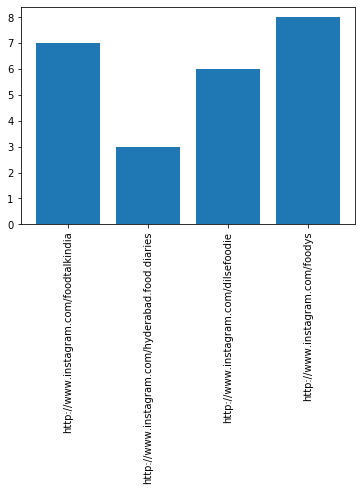

In [11]:
##### plotted a relevant graph for the project
plt.bar(user_handles,post_made_by_user_handle)
plt.xticks(rotation = 90)
plt.show()

In [12]:
###### wen to the base page url
driver.get('http://www.instagram.com')

In [13]:
##### searched for fpod again to get some hashtags
time.sleep(3)
entry = driver.find_element_by_xpath('/html/body/span/section/nav/div[2]/div/div/div[2]/input')
entry.send_keys('food')

In [14]:
##### saved the hashtas respective;y
time.sleep(3)
data = driver.find_elements_by_class_name('Ap253')
count=0

hash_tags = []

max_count=5
for i in data:
    
    if i.text[0]=='#':
        count+=1
        if count==max_count+1:
            break
        print(i.text)
        hash_tags.append('https://www.instagram.com/explore/tags/'+i.text[1:])

hash_tags

#foodporn
#food
#foodphotography
#foodie
#foods


['https://www.instagram.com/explore/tags/foodporn',
 'https://www.instagram.com/explore/tags/food',
 'https://www.instagram.com/explore/tags/foodphotography',
 'https://www.instagram.com/explore/tags/foodie',
 'https://www.instagram.com/explore/tags/foods']

In [34]:
###### scrapd data for the repetetion of tag values and stored it in the csv file after creating a dictionary
no_of_posts_to_scrape = 2
all_post_data = list()
content = ""
for i in range(len(user_handles)):
    driver.get(user_handles[i])
    time.sleep(3)
    image =  driver.find_element_by_class_name('_9AhH0')
    image.click()
    for j in range(no_of_posts_to_scrape):
        time.sleep(2)
        data = driver.find_element_by_xpath('/html/body/div[3]/div[2]/div/article/div[2]/div[1]/ul/div/li/div/div/div[2]/span')
        content = data.text
#         print(content)
        content = content.split()
#         print(content)
    for key in content:
        all_post_data.append(key)

In [37]:
#### checking the no of relevant rows
len(all_post_data)

123

In [38]:
#### created a dictionary before making the csv
dict = {}
for i in all_post_data:
    if i in dict:
        dict[i] += 1
    else:
        dict[i] = 1

In [48]:
#### made a pandas file to create it to csv
li = []
for i in dict:
    li.append([i,dict[i]])
li_pandas = pd.DataFrame(li)

In [51]:
#### made the csv document
li_pandas.to_csv('data_text.csv',index=False)

In [73]:
#### seprated indices and values
indices = li_pandas[0].value_counts().index
values = li_pandas[0].value_counts().values

In [97]:
##### made a ploting dataset
plot_index = []
plot_value = []
count= 0
for i in range(len(indices)):
    if(indices[i][0]=='#'):
        count+=1
        if count==6:
            break
        plot_index.append(indices[i])
        plot_value.append(values[i]-0.7)

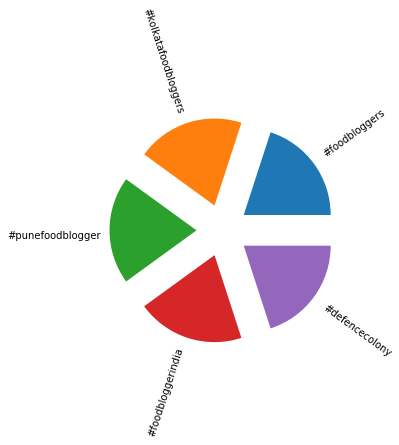

In [99]:
####### stored the data and created a pie chart
plt.pie(plot_value,labels=plot_index,explode=plot_value,rotatelabels=45)
plt.show()

In [131]:
# no_of_posts_to_scrape = 4

# driver.get(user_handles[0])
# time.sleep(2)
# image = driver.find_element_by_class_name('_9AhH0')
# image.click()
# likes = 0
# flag_first_time = True
# time.sleep(2)
# for i in range(no_of_posts_to_scrape):
#     time.sleep(4)
#     content = driver.find_element_by_xpath('/html/body/div[3]/div[2]/div/article/div[2]/section[2]/div/div/button/span')
#     cont = content.text.replace(',','')
#     likes+=int(cont)
    
#     if flag_first_time:
#         button = driver.find_element_by_xpath('/html/body/div[3]/div[1]/div/div/a')
#         flag_first_time = False
#     else:
#         button = driver.find_element_by_xpath('/html/body/div[3]/div[1]/div/div/a[2]')
#     button.click()
# print(likes)
# button = driver.find_element_by_xpath('/html/body/div[3]/button[1]')
# button.click()


281000


In [134]:
##### used it to collect data regarding likes and averages and total followers
no_of_posts_to_scrape = 2
all_post_data = list()
followers_size = list()
content = ""
total = 0
liked = []
for i in range(len(user_handles)):    
    driver.get(user_handles[i])
    data = driver.find_element_by_xpath('/html/body/span/section/main/div/header/section/ul/li[2]/a/span')
    cont = data.text
    if(cont[-1]=='k'):
        value = int(float(cont[:len(cont)-1]))*1000
    elif(cont[-1]=='m'):
        value = int(float(cont[:len(cont)-1]))*100000
    else:
        value = int(float(cont))
    followers_size.append(value)

    time.sleep(4)
    image = driver.find_element_by_class_name('_9AhH0')
    image.click()
    likes = 0
    flag_first_time = True
    time.sleep(2)
    for i in range(no_of_posts_to_scrape):
        time.sleep(4)
        try:
            content = driver.find_element_by_xpath('/html/body/div[3]/div[2]/div/article/div[2]/section[2]/div/div/button/span')
        except:
            content = driver.find_element_by_xpath('/html/body/div[3]/div[2]/div/article/div[2]/section[2]/div/span/span')
        cont = content.text.replace(',','')
        likes+=int(cont)

        if flag_first_time:
            button = driver.find_element_by_xpath('/html/body/div[3]/div[1]/div/div/a')
            flag_first_time = False
        else:
            button = driver.find_element_by_xpath('/html/body/div[3]/div[1]/div/div/a[2]')
        button.click()
    liked.append(likes)
    total+=likes
    button = driver.find_element_by_xpath('/html/body/div[3]/button[1]')
    button.click()
    
for i in range(len(user_handles)):
    liked[i]//=len(user_handles)
print("average values are as follows")
print(liked)

average values are as follows
[233, 940, 7760, 184042]


ratio for liked by followers is as follows
0.0008291814946619217
0.012702702702702703
0.027132867132867132
0.20449111111111112


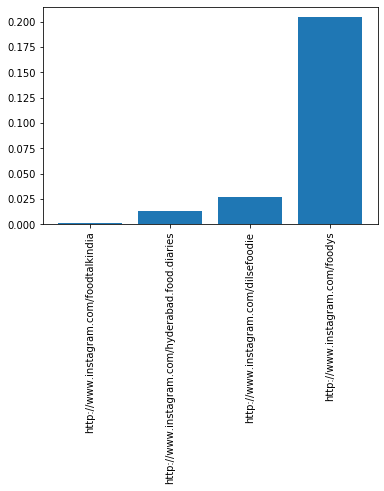

In [144]:
#### plotted a relevant graph for the same
liked_numpy = np.array(liked)
followers_size_numpy = np.array(followers_size)
print('ratio for liked by followers is as follows')

final_data = liked_numpy/followers_size_numpy
for i in (final_data):
    print(i)

plt.bar(user_handles,final_data)
plt.xticks(rotation=90)
plt.show()